# Obtaining solar-eclipse information

- https://docs.sunpy.org/en/stable/generated/gallery/showcase/eclipse_amount.html

How to obtain information about a solar eclipse

The function `sunpy.coordinates.sun.eclipse_amount` returns how much of
the Sun is occulted by the Moon at the specified time(s).  This example
showcases how one can use the the output of this function to calculate the
start/end times of an eclipse and to plot the eclipse amount as a function of
time.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import DateFormatter

import astropy.units as u
from astropy.coordinates import EarthLocation, solar_system_ephemeris
from astropy.time import Time

from sunpy.coordinates import sun

Define a location near San Antonio, Texas, that falls on both the path of
the 2023 annular eclipse and the path of the 2024 total eclipse.

In [ ]:
location = EarthLocation.from_geodetic(-98.5*u.deg, 29.6*u.deg)
max2023 = Time('2023-10-14 16:54')
max2024 = Time('2024-04-08 18:35')

Define a function to calculate start/end eclipse times and plot the eclipse
timeseries within +/- 2 hours of the time of interest.

In [ ]:
def plot_eclipse_timeseries(location, time):
    # Define an array of observation times centered around the time of interest
    times = time + np.concatenate([np.arange(-120, -5) * u.min,
                                   np.arange(-300, 300) * u.s,
                                   np.arange(5, 121) * u.min])

    # Create an observer coordinate for the time array
    observer = location.get_itrs(times)

    # Calculate the eclipse amounts using a JPL ephemeris
    with solar_system_ephemeris.set('de440s'):
        amount = sun.eclipse_amount(observer)
        amount_minimum = sun.eclipse_amount(observer, moon_radius='minimum')

    # Calculate the start/end points of partial/total solar eclipse
    partial = np.flatnonzero(amount > 0)
    if len(partial) > 0:
        print("Eclipse detected:")
        start_partial, end_partial = times[partial[[0, -1]]]
        print(f"  Partial solar eclipse starts at {start_partial} UTC")

        total = np.flatnonzero(amount_minimum == 1)
        if len(total) > 0:
            start_total, end_total = times[total[[0, -1]]]
            print(f"  Total solar eclipse starts at {start_total} UTC\n"
                  f"  Total solar eclipse ends at {end_total} UTC")
        print(f"  Partial solar eclipse ends at {end_partial} UTC")

    # Plot the eclipse timeseries
    fig = plt.figure(layout="constrained")
    ax = fig.add_subplot()

    ax.plot(times.datetime64, amount)

    ax.set_ylim(0, 105)

    ax.xaxis.set_major_formatter(DateFormatter('%I:%M %p', tz='US/Central'))
    ax.tick_params('x', rotation=90)

    ax.set_title(f"{time.strftime('%Y %B %d')}")
    ax.set_ylabel("Eclipse percentage")
    ax.set_xlabel("Local time (US/Central)")
    ax.grid()

Plot the timeseries for the 2023 annular eclipse.  Note that the eclipse
amount reaches a maximum of only ~90%, as expected.

Eclipse detected:
  Partial solar eclipse starts at 2023-10-14 15:24:00.000 UTC
  Partial solar eclipse ends at 2023-10-14 18:32:00.000 UTC


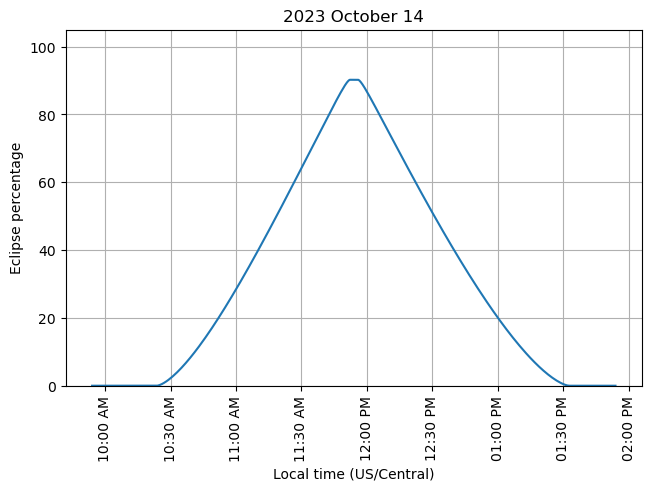

In [ ]:
plot_eclipse_timeseries(location, max2023)

Plot the timeseries for the 2024 total eclipse.  Since the eclipse amount
reaches 100%, the above function also calculates the start/end of total
eclipse.

Eclipse detected:
  Partial solar eclipse starts at 2024-04-08 17:15:00.000 UTC
  Total solar eclipse starts at 2024-04-08 18:33:44.000 UTC
  Total solar eclipse ends at 2024-04-08 18:35:34.000 UTC
  Partial solar eclipse ends at 2024-04-08 19:55:00.000 UTC


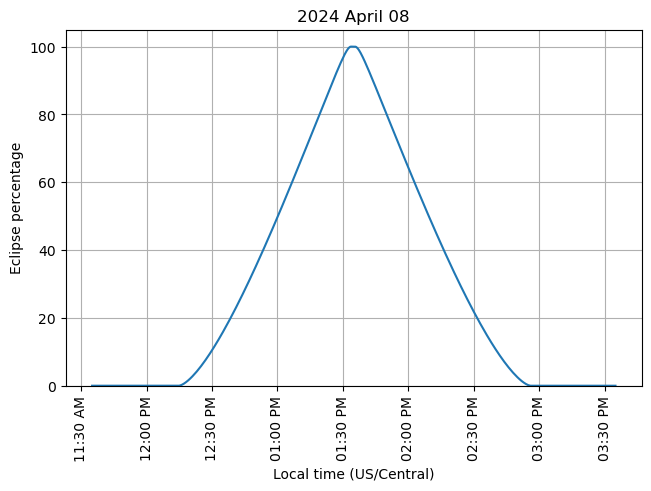

In [ ]:
plot_eclipse_timeseries(location, max2024)

plt.show()